In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

k = pd.DataFrame()
k['X'] = np.arange(5)+3
k['Y'] = [1, 3, 4, 8, 12]
k

,X,Y
0,3,1
1,4,3
2,5,4
3,6,8
4,7,12


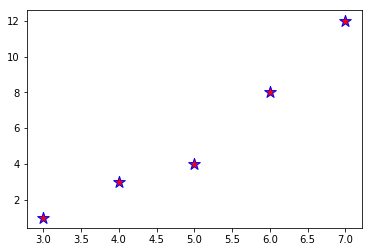

In [2]:
pyplot.scatter(k['X'], k['Y'], s = 150, c = 'red', marker = '*', edgecolors = 'blue')

In [3]:
k.corr(method='pearson')

,X,Y
X,1.000000,0.971751
Y,0.971751,1.000000


### Correlation non linéaire ...

In [4]:
k['Y'] = [1, 1, 3, 2, 4]
k

,X,Y
0,3,1
1,4,1
2,5,3
3,6,2
4,7,4


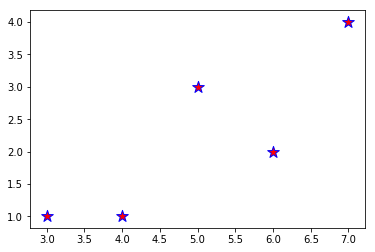

In [5]:
pyplot.scatter(k['X'], k['Y'], s = 150, c = 'red', marker = '*', edgecolors = 'blue')

In [6]:
k.corr(method='spearman')

,X,Y
X,1.000000,0.872082
Y,0.872082,1.000000


In [7]:
k.corr(method='kendall')

,X,Y
X,1.000000,0.737865
Y,0.737865,1.000000


In [8]:
k.corr(method='pearson')

,X,Y
X,1.000000,0.848875
Y,0.848875,1.000000


In [9]:
k['X'].corr(k['Y'])

0.8488746876271654

### Utilisons les données du Titanic

In [10]:
titanic = pd.read_csv("../datasources/titanic/train.csv")

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data = titanic.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [13]:
data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))
# Cf. https://matplotlib.org/examples/color/colormaps_reference.html pour les codes couleurs

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,-0.005,-0.034,0.041,-0.061,0.0012,-0.014
Survived,-0.005,1.0,-0.34,-0.053,0.089,0.14,0.32
Pclass,-0.034,-0.34,1.0,-0.36,-0.043,-0.023,-0.69
Age,0.041,-0.053,-0.36,1.0,-0.18,-0.25,0.14
SibSp,-0.061,0.089,-0.043,-0.18,1.0,0.45,0.45
Parch,0.0012,0.14,-0.023,-0.25,0.45,1.0,0.41
Fare,-0.014,0.32,-0.69,0.14,0.45,0.41,1.0
